In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Load the data
df = pd.read_csv("matched_sensor_data.csv")
df = df[["temperature", "humidity", "soundLevel", "event"]]

# Manual mapping: fire → 1, normal → 0
df["event_encoded"] = df["event"].map({"normal": 0, "fire": 1})

# Features and target
X = df[["temperature", "humidity", "soundLevel"]]
y = df["event_encoded"]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split (stratify to keep class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [3]:
# Build the model
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(3,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


c:\Codes\Software Development Assignment\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Train
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16, 
    validation_split=0.1,
    verbose=1
    )

Epoch 1/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7480 - loss: 0.5001 - val_accuracy: 0.9947 - val_loss: 0.2214
Epoch 2/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9997 - loss: 0.0804 - val_accuracy: 1.0000 - val_loss: 0.0198
Epoch 3/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9997 - loss: 0.0125 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 4/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9997 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 5/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9997 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9997 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9997 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 9.3213e-04
Epoch 8/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9997 - loss: 0.0026 - val_accuracy

In [5]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred))


Test Accuracy: 1.0000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      1.00      1.00       136

    accuracy                           1.00       936
   macro avg       1.00      1.00      1.00       936
weighted avg       1.00      1.00      1.00       936



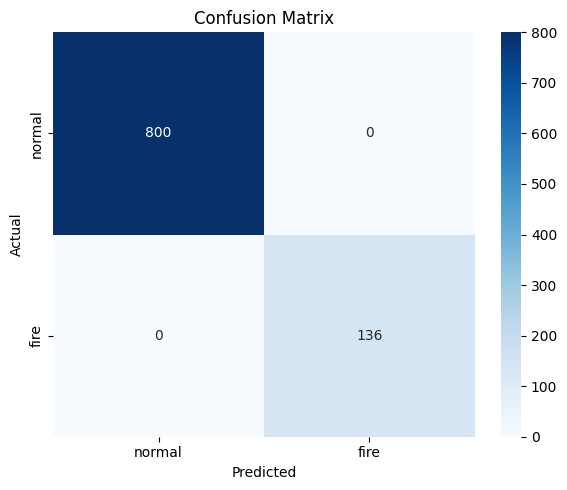

In [6]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Manually define labels since no LabelEncoder was used
labels = ["normal", "fire"]

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [ ]:
# Save model
model.save("models/nn_model.keras")

# Save scaler
joblib.dump(scaler, "models/scaler.pkl")

['models/scaler.pkl']